# The Battle of Neighborhoods: Starting a Wholesale Coffee Supplier Business in Delhi, India
__Build models for segmenting the neighborhoods to find the most conducive locations for starting a Wholesale Coffee Supplier Business in Delhi, India.__

Applied Data Science Capstone by IBM/Coursera <br>
Author: [Kanishk Kumar](https://www.linkedin.com/in/kanishkkumar11/)
<hr>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology: Analytic Approach](#methodology)
* [Methodology: Exploratory Data Analysis](#analysis)
* [Methodology: Cluster the Neighborhoods](#cluster)
* [Results](#results)
* [Conclusion](#conclusion)


# Introduction <a name="introduction"></a>
<hr>

## Background
Delhi is India's second largest city with a population of more than __11 million__ and a density of __11,312__ people per square kilometer. It is one of the oldest cities in the world, and has been continuously inhabited since the 6th century BCE serving as a capital of various kingdoms and empires. For many centuries Delhi has been a __dominant trading and commercial center__ in northern India, and after 1990s it has emerged as an important node in the __international corporate and financial network.__ This leads the city to become a world leader among other metropolitan and cosmopolitan cities from many sectors, including __business__.

## Business Problem

__Stardoves__, a hypothetical wholesale coffee beans supplier is looking for the right neighborhood in Delhi for setting up their services.

To ensure this project’s success, the team requires insights into the demographics and neighboring businesses. For each neighborhood, we can ask:
- Which has the highest coffee store and cafe density?
- Are its surrounding neighborhoods compatible and fall in the same segment?

Thus, the __project goal__ is to figure out the best locations for setting up the agency in Delhi that meets the criteria.

## Target Audience
__Entrepreneurs__ who are passionate about wholesale business in a metropolitan city would be very interested in this project. The project is also for __business owners__ and __stakeholders__ who want to expand their businesses and wonder how data science could be applied to the questions at hand.

# Data <a name="data"></a>
<hr>

## Data Requirement and Collection
Following data sources will be needed to extract/generate the required information:

- A [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi) will be scraped for Borough and Neighbourhood details of Delhi.


- Coordinates of the neighborhoods from the scraped data will be obtained using [Geopy.](https://pypi.org/project/geopy/)

- The number of venues, their type and location in every neighborhood will be obtained using [Foursquare API.](https://developer.foursquare.com/docs/places-api/)

## Data Cleaning and Feature Extraction


- The first data is a Wikipedia page about the neighborhoods of Delhi. We will scrape the page and create a data frame consisting of two columns; __Borough__, and __Neighborhood__. We remove any rows that do not have borough assigned. Then, we will be using the __Geocoder__ python package to retrieve the neighborhoods's coordinates. It will return 108 rows and 4 columns.


- The second data is stored inside __Foursquare Location Data__, and we will use __Foursquare API__ to access it. We utilize the neighbourhood names to retrieve popular venues around a specific radius. As a result, the same venue categories will be returned to different neighborhoods. We can use this idea to cluster the neighborhoods based on their venues representing services and amenities.


- We will run the ___k-Means___ algorithm to perform this clustering with different number of clusters (k). The __features will be the mean of the frequency of occurrence of each venue category__. Finally, we can visualize the cluster model using the Folium module. 

To sum up, we will use the 1st data to obtain the exact coordinates for each neighborhood based on their names, allowing us to explore and map the city. We will then use the coordinates and Foursquare credentials to access the 2nd data source through its API and retrieve the popular venues along with their details, especially for coffee shops.

# Methodology
<hr>


## Analytic Approach <a name="methodology"></a>

We approach the problem using the clustering technique, namely __k-Means__. This approach enables the audience to see similarity between neighborhoods through their demographics. We can then examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

__k-Means__ is one of the common machine learning algorithms used to cluster data points based on similar characteristics. The algorithm is fast and efficient for a medium and large-sized database and is useful to discover insights from unlabeled data quickly.

Lets install all the libraries that will be required for this project.

In [1]:
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import pandas as pd
from pandas.io.json import json_normalize
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### Scraping the Wikipedia Page
We will scrape the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Delhi) of neighborhoods of Delhi for the Borough and Neighbourhood data. 

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi'
r = requests.get(url).text
soup = BeautifulSoup(r, 'lxml')

In [3]:
div = soup.find('div', class_ = 'mw-parser-output')
div

<div class="mw-parser-output"><p class="mw-empty-elt">
</p>
<div class="thumb tright"><div class="thumbinner" style="width:302px;"><a class="image" href="/wiki/File:Delhi_district_map.jpg"><img alt="" class="thumbimage" data-file-height="730" data-file-width="800" decoding="async" height="274" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Delhi_district_map.jpg/300px-Delhi_district_map.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Delhi_district_map.jpg/450px-Delhi_district_map.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Delhi_district_map.jpg/600px-Delhi_district_map.jpg 2x" width="300"/></a> <div class="thumbcaption"><div class="magnify"><a class="internal" href="/wiki/File:Delhi_district_map.jpg" title="Enlarge"></a></div>Map showing the eleven <a class="mw-redirect" href="/wiki/Districts_of_Delhi" title="Districts of Delhi">districts</a> of Delhi</div></div></div><p>.
</p><p><a href="/wiki/Delhi" title="Delhi">Delhi</a> is a vast city

### Creating a dataframe from the scraped information
We will use the information scraped using BeautifulSoup to create the DataFrame which we can use in the project.

In [4]:
data = pd.DataFrame(columns = ['Borough', 'Neighbourhood'])
i = -1
no = 0
flag = False
for child in div.children:
    if child.name:
        span = child.find('span')
        if span != 1 and span is not None:
            try: 
                if span['class'][0] == 'mw-headline' and child.a.text!='edit':
                    borough = child.a.text
                    i += 1
                    flag = True
                    continue
            except KeyError:
                continue
                
        if child.name == 'ul' and flag == True:
            neighbourhood = []
            for ch in child.children:
                try:
                    data.loc[no] = [borough,ch.text]
                    no += 1
                except AttributeError:
                    pass
        flag = False
data

,Borough,Neighbourhood
0,North West Delhi,Adarsh Nagar
1,North West Delhi,Ashok Vihar
2,North West Delhi,Begum Pur
3,North West Delhi,Karala
4,North West Delhi,Model Town
...,...,...
109,West Delhi,Rajouri Garden
110,West Delhi,Tihar Village
111,West Delhi,Tilak Nagar
112,West Delhi,Vikas Nagar


### Using Geopy API to get location data for each of the neighborhoods
The Neighbourhood data scraped above can be used to obtain the coordinates of all neighborhoods using Geopy.

In [5]:
lat_lng = pd.DataFrame(columns = ['Neighbourhood', 'latitude', 'longitude'])
geolocator = Nominatim(user_agent = "kanishk")
for i in range(114):
    address = data['Neighbourhood'].loc[i] + ', New Delhi'
    try: 
        location = geolocator.geocode(address)
        lat_lng.loc[i] = [data['Neighbourhood'].loc[i], location.latitude, location.longitude]
    except AttributeError:
        continue
lat_lng

,Neighbourhood,latitude,longitude
0,Adarsh Nagar,28.614193,77.071541
1,Ashok Vihar,28.699453,77.184826
2,Begum Pur,28.725503,77.058371
3,Karala,28.735140,77.032511
4,Model Town,28.702714,77.193991
...,...,...,...
109,Rajouri Garden,28.645112,77.123933
110,Tihar Village,28.634636,77.107112
111,Tilak Nagar,28.639650,77.094039
112,Vikas Nagar,28.644009,77.054470


## Data Cleaning
Removing the unwanted columns and rows from dataset.

In [6]:
df = pd.merge(data, lat_lng, on = 'Neighbourhood', suffixes = [False, False])
df.rename(columns = {"Neighbourhood": "Neighborhood", "latitude": "Latitude", "longitude": "Longitude"}, inplace=True)
df.drop([3], axis=0, inplace=True) # Dropping Karala since Foursquare has no data on it.
df.reset_index(drop=True, inplace=True)
df

,Borough,Neighborhood,Latitude,Longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Begum Pur,28.725503,77.058371
3,North West Delhi,Model Town,28.702714,77.193991
4,North West Delhi,Narela,28.842610,77.091835
...,...,...,...,...
102,West Delhi,Rajouri Garden,28.645112,77.123933
103,West Delhi,Tihar Village,28.634636,77.107112
104,West Delhi,Tilak Nagar,28.639650,77.094039
105,West Delhi,Vikas Nagar,28.644009,77.054470


In [7]:
df.to_csv("delhi_neighborhoods.csv", index=False)

### Visualizing the neighborhoods in the City of Delhi
Let's display the neighborhoods of Delhi on a map using Folium.

In [8]:
ND_map = folium.Map(location=[28.52, 77.25], zoom_start=12)
for latitude, longitude, neighborhood, borough in zip(df['Latitude'], df['Longitude'],df['Neighborhood'],df['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,parse_html=False).add_to(ND_map)  

ND_map

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood.

Foursquare Credentials will be needed while running this step. 

In [9]:
CLIENT_ID = 'JYO1E0RYGAT2EZFEPFFEYAFWRMAUNQS4X53MEAFOVRP4G3FF'
CLIENT_SECRET = '0GYONRQKBUSGHLLMSBIEKXTD1DW4UW4OCJ20PCEWIRO5RF2V'
VERSION = '20200227'

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        radius=1000  
        LIMIT=1000
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
delhi_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Adarsh Nagar
Ashok Vihar
Begum Pur
Model Town
Narela
Pitam Pura
Shalimar Bagh
Civil Lines
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Mori Gate; Delhi
Sadar Bazaar
Sarai Rohilla
Shakti Nagar
Tis Hazari
Timarpur
Wazirabad
Dilshad Garden
Naveen Shahdara
Shahdara
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Shastri Nagar
Kishanganj
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
East Vinod Nagar
Jhilmil Colony
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Preet Vihar
Anand Vihar
Vasundhara Enclave
Vishwas Nagar
Vivek Vihar
Alaknanda
Chattarpur
Chittaranjan Park
Defence Colony
East of Kailash
Govindpuri
Greater Kailash
Green Park
Gulmohar Park
Hauz Khas
Hauz Khas Village
Jangpura
Jor Bagh
Kalkaji
Khanpur
Lajpat Nagar
Lodi Colony
Malviya Nagar
Mehrauli
Neeti Bagh
Nehru Place
Netaji Nagar
New Friends Colony
Nizamuddin West
Okhla
Safdarjung Enclave
Sainik Farm
Saket
Sangam Vihar
Sarita Vihar
Sarojini Nagar
Sarvodaya Enclave
Siri Fort
South Extension
Sriniwaspuri
Tu

In [13]:
delhi_venues.to_csv("delhi_venues.csv", index=False)

## Exploratory Data Analysis <a name="analysis"></a>

In [14]:
delhi_venues = pd.read_csv('delhi_venues.csv')
delhi_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
1,Adarsh Nagar,28.614192,77.071541,Uttam nagar,28.620201,77.068709,Metro Station
2,Adarsh Nagar,28.614192,77.071541,Gold's Gym A Block Janakpuri,28.622439,77.069348,Gym
3,Adarsh Nagar,28.614192,77.071541,Potholes at Dabri,28.605309,77.072504,Pool
4,Ashok Vihar,28.699453,77.184826,Bellagio,28.696361,77.180021,Asian Restaurant
...,...,...,...,...,...,...,...
2381,Vikaspuri,28.638419,77.070836,Cafe Coffee Day,28.636239,77.062916,Café
2382,Vikaspuri,28.638419,77.070836,McDonald's,28.636299,77.062886,Fast Food Restaurant
2383,Vikaspuri,28.638419,77.070836,PVR Cinemas,28.639047,77.074937,Multiplex
2384,Vikaspuri,28.638419,77.070836,Mela,28.635672,77.067237,Indian Restaurant


Let's check how many venues were returned for each neighborhood.

In [15]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,4,4,4,4,4,4
Alaknanda,29,29,29,29,29,29
Anand Vihar,17,17,17,17,17,17
Ashok Nagar,72,72,72,72,72,72
Ashok Vihar,9,9,9,9,9,9
...,...,...,...,...,...,...
Vikaspuri,9,9,9,9,9,9
Vishwas Nagar,6,6,6,6,6,6
Vivek Vihar,10,10,10,10,10,10


Let's find out how many unique categories can be curated from all the returned venues.

In [16]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 191 uniques categories.


Lets analyze each Neighborhood.

In [17]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
first_col = delhi_onehot.pop('Neighborhood')
delhi_onehot.insert(0,'Neighborhood', first_col)

delhi_onehot

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wings Joint,Women's Store
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Vikaspuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,Vikaspuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2383,Vikaspuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2384,Vikaspuri,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [18]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped

,Neighborhood,ATM,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wings Joint,Women's Store
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ashok Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vikaspuri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,Vishwas Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,Vivek Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,Wazirabad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's print each neighborhood along with the top 5 most common venues.

In [19]:
num_top_venues = 5

for hood in delhi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adarsh Nagar----
               venue  freq
0               Pool  0.25
1      Metro Station  0.25
2                Gym  0.25
3  Indian Restaurant  0.25
4          Multiplex  0.00


----Alaknanda----
               venue  freq
0        Coffee Shop  0.14
1         Restaurant  0.10
2   Asian Restaurant  0.10
3  Indian Restaurant  0.07
4          BBQ Joint  0.07


----Anand Vihar----
                venue  freq
0      Clothing Store  0.24
1               Hotel  0.12
2           Multiplex  0.12
3          Food Court  0.06
4  Light Rail Station  0.06


----Ashok Nagar----
                  venue  freq
0                 Hotel  0.26
1     Indian Restaurant  0.12
2                  Café  0.08
3  Fast Food Restaurant  0.06
4                   Bar  0.04


----Ashok Vihar----
                     venue  freq
0               Donut Shop  0.11
1         Asian Restaurant  0.11
2              Snack Place  0.11
3              Coffee Shop  0.11
4  South Indian Restaurant  0.11


----Badarpur----
    

Let's put the data above into a *pandas* dataframe. We'll need a function to sort the venues in descending order.

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
delhi_venues_sorted = pd.DataFrame(columns=columns)
delhi_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]): 
    delhi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

delhi_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Pool,Indian Restaurant,Gym,Metro Station,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
1,Alaknanda,Coffee Shop,Restaurant,Asian Restaurant,Market,Indian Restaurant,Dessert Shop,BBQ Joint,Thai Restaurant,Chinese Restaurant,Sandwich Place
2,Anand Vihar,Clothing Store,Multiplex,Hotel,Pizza Place,Movie Theater,Shopping Mall,Café,Gym,Food Court,Bus Station
3,Ashok Nagar,Hotel,Indian Restaurant,Café,Fast Food Restaurant,Bar,Food & Drink Shop,Restaurant,Dessert Shop,Platform,Lounge
4,Ashok Vihar,South Indian Restaurant,Asian Restaurant,Donut Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,Snack Place,Pizza Place,Indian Restaurant,Hotel
...,...,...,...,...,...,...,...,...,...,...,...
102,Vikaspuri,Pizza Place,Café,Fast Food Restaurant,Indian Restaurant,Multiplex,Park,Men's Store,Flower Shop,Fried Chicken Joint,French Restaurant
103,Vishwas Nagar,Gym,Pizza Place,Shopping Mall,Big Box Store,Hotel,Women's Store,Flower Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
104,Vivek Vihar,Pool,Hotel,Metro Station,BBQ Joint,Athletics & Sports,Track,Asian Restaurant,Shop & Service,Juice Bar,Indian Restaurant
105,Wazirabad,Market,Women's Store,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


## Cluster The Neighborhoods <a name="cluster"></a>

Now, lets Cluster all the Neighborhoods. We'll use the __Silhouette Coefficient Method__ to select the optimal numbers of cluster.

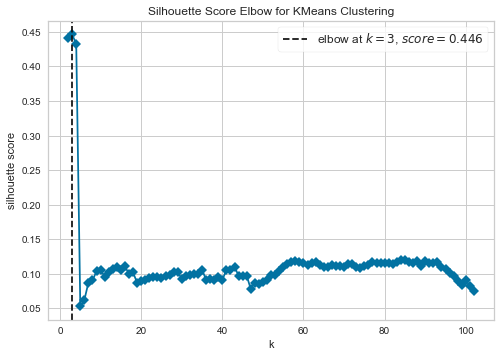

In [22]:
kclusters = (2, 103)

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = kclusters, metric = 'silhouette', timings = False, random_state = 42)

visualizer.fit(delhi_grouped_clustering)
visualizer.show()

From the above plot, we observe that 3 is the optimal number of clusters. We'll run *k*-means to cluster the neighborhood into 3 clusters.

In [23]:
# set number of clusters
kclusters = 3
delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 42).fit(delhi_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [24]:
# add clustering labels
delhi_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
delhi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(delhi_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
delhi_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,1,Pool,Indian Restaurant,Gym,Metro Station,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1,South Indian Restaurant,Asian Restaurant,Donut Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,Snack Place,Pizza Place,Indian Restaurant,Hotel
2,North West Delhi,Begum Pur,28.725503,77.058371,1,Accessories Store,Women's Store,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
3,North West Delhi,Model Town,28.702714,77.193991,1,Pizza Place,Department Store,Track Stadium,Food Truck,Men's Store,Coffee Shop,Bank,Bakery,Fast Food Restaurant,Snack Place
4,North West Delhi,Narela,28.842610,77.091835,1,Furniture / Home Store,Mobile Phone Shop,Women's Store,Gastropub,Garden,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,West Delhi,Rajouri Garden,28.645112,77.123933,1,Fast Food Restaurant,Indian Restaurant,Café,Pizza Place,Bakery,Park,Dessert Shop,Pub,Multiplex,Snack Place
103,West Delhi,Tihar Village,28.634636,77.107112,1,Fast Food Restaurant,Restaurant,Donut Shop,Coffee Shop,Multiplex,Food Court,Café,Shopping Mall,Stadium,Department Store
104,West Delhi,Tilak Nagar,28.639650,77.094039,1,Clothing Store,Fast Food Restaurant,Donut Shop,Furniture / Home Store,Fried Chicken Joint,Café,Light Rail Station,Farmers Market,Women's Store,Food & Drink Shop
105,West Delhi,Vikas Nagar,28.644009,77.054470,1,Pool,Business Service,Music Store,Dim Sum Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


Finally, let's visualize the resulting clusters.

In [25]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)
# set color scheme for the clusters
colors = ['red','cyan','green', 'pink', 'blue' ,'white','grey']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Lets examine the Clusters.

In [26]:
#Adding 1 to CLuster labels so that that the labels will start from 1 rather than 2
delhi_merged['Cluster Labels']=delhi_merged['Cluster Labels']+1

We'll visualize a counterplot using Seaborn to check which Cluster has the most numbers of Cafes and Coffee shops.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

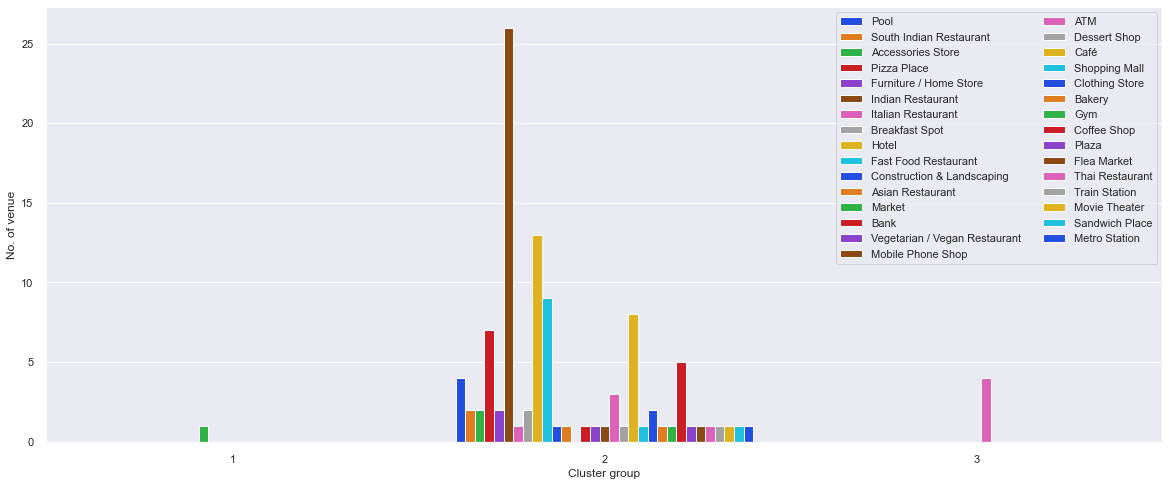

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Cluster Labels",hue="1st Most Common Venue", data=delhi_merged, palette='bright',orient='h')
plt.xlabel('Cluster group')
plt.ylabel('No. of venue')
#for i in range(0,5):
 #   plt.axvline(0.5+i,color='black')
ax.legend(ncol=2, loc="upper right", frameon=True)    
plt.plot

From the above plot, we observe that cluster 2 has the highest number of Cafes and Coffee Shops. Let's closely examine each cluster.

#### Cluster 1

In [28]:
clus1=delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]
clus1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Wazirabad,Market,Women's Store,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


#### Cluster 2

In [29]:
clus2=delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]
clus2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Pool,Indian Restaurant,Gym,Metro Station,Flea Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
1,Ashok Vihar,South Indian Restaurant,Asian Restaurant,Donut Shop,Fast Food Restaurant,Coffee Shop,Sandwich Place,Snack Place,Pizza Place,Indian Restaurant,Hotel
2,Begum Pur,Accessories Store,Women's Store,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
3,Model Town,Pizza Place,Department Store,Track Stadium,Food Truck,Men's Store,Coffee Shop,Bank,Bakery,Fast Food Restaurant,Snack Place
4,Narela,Furniture / Home Store,Mobile Phone Shop,Women's Store,Gastropub,Garden,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
...,...,...,...,...,...,...,...,...,...,...,...
102,Rajouri Garden,Fast Food Restaurant,Indian Restaurant,Café,Pizza Place,Bakery,Park,Dessert Shop,Pub,Multiplex,Snack Place
103,Tihar Village,Fast Food Restaurant,Restaurant,Donut Shop,Coffee Shop,Multiplex,Food Court,Café,Shopping Mall,Stadium,Department Store
104,Tilak Nagar,Clothing Store,Fast Food Restaurant,Donut Shop,Furniture / Home Store,Fried Chicken Joint,Café,Light Rail Station,Farmers Market,Women's Store,Food & Drink Shop
105,Vikas Nagar,Pool,Business Service,Music Store,Dim Sum Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


#### Cluster 3

In [30]:
clus3=delhi_merged.loc[delhi_merged['Cluster Labels'] == 3, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]
clus3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Yamuna Vihar,ATM,Pizza Place,Flea Market,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
72,Sangam Vihar,ATM,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
73,Sarita Vihar,ATM,Flower Shop,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
79,Tughlaqabad,ATM,Castle,Historic Site,Garden Center,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court


Clearly most Cafés and Coffee Shops fall in Cluster 2.

## Results <a name="results"></a>
Let's rank and display the top recommended neighborhoods to open a new whole sale coffee business.

In [31]:
it_res1=clus2.loc[clus2['1st Most Common Venue'] == 'Coffee Shop']
it_res1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Alaknanda,Coffee Shop,Restaurant,Asian Restaurant,Market,Indian Restaurant,Dessert Shop,BBQ Joint,Thai Restaurant,Chinese Restaurant,Sandwich Place
53,Hauz Khas,Coffee Shop,Indian Restaurant,Café,Sandwich Place,Hotel,Hostel,Lounge,Market,Garden,Furniture / Home Store
63,Neeti Bagh,Coffee Shop,Pizza Place,Café,Indian Restaurant,Stadium,Park,Theater,Chinese Restaurant,Golf Course,Mexican Restaurant
75,Sarvodaya Enclave,Coffee Shop,Café,Indian Restaurant,Pub,Record Shop,Parsi Restaurant,Chinese Restaurant,Miscellaneous Shop,Golf Course,Sandwich Place
91,Rama Krishna Puram,Coffee Shop,Thai Restaurant,Convenience Store,Café,Park,South Indian Restaurant,Gourmet Shop,Multiplex,Restaurant,Comfort Food Restaurant


In [32]:
it_res2=clus2.loc[clus2['1st Most Common Venue'] == 'Café']
it_res2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,East Vinod Nagar,Café,Dessert Shop,Sandwich Place,Wings Joint,Juice Bar,Park,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck
54,Hauz Khas Village,Café,Indian Restaurant,Coffee Shop,Restaurant,Market,Bar,Bakery,Donut Shop,Asian Restaurant,Pizza Place
66,New Friends Colony,Café,Hotel,Indian Restaurant,Lounge,Dessert Shop,Pizza Place,Plaza,Nightclub,Fast Food Restaurant,Sandwich Place
69,Safdarjung Enclave,Café,Park,Lounge,Indian Restaurant,Hotel,Gym / Fitness Center,Nightclub,Restaurant,Coffee Shop,French Restaurant
76,Siri Fort,Café,Indian Restaurant,Market,Stadium,Hotel,Bakery,Park,Donut Shop,Ice Cream Shop,Chinese Restaurant
83,Dhaula Kuan,Café,Indian Restaurant,Bakery,Hotel,Golf Course,French Restaurant,Outdoors & Recreation,Park,Deli / Bodega,Pool
87,Munirka,Café,Coffee Shop,Indian Restaurant,Department Store,Chinese Restaurant,Pizza Place,Restaurant,Fast Food Restaurant,Food & Drink Shop,Gourmet Shop
93,Vasant Vihar,Café,Chinese Restaurant,Pizza Place,Coffee Shop,Restaurant,Fast Food Restaurant,Movie Theater,Cocktail Bar,Donut Shop,Sandwich Place


## Conclusion <a name="conclusion"></a>

In this study, I analyzed the neighborhoods of Delhi. I identified and segmented its neighborhoods based on the number and types of venues in them. I built clustering models and classification models to find the best neighborhoods for a Wholesale Coffee Supplier Business. These models can be very useful for entrepreneurs who are passionate about wholesale business in a metropolitan city.